In [173]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import tensorflow as tf

In [174]:
#  Import and read the Update_Listings_cleaned_v1.csv
import pandas as pd 
data = pd.read_csv("Update_Listings_cleaned_v1.csv")
data.head()

,unique_identifier,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
0,0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,...,0,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B
1,1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,...,0,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A
2,2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,...,0,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B
3,3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,...,0,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A
4,4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,...,0,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA


In [175]:
# Drop the non-beneficial columns and select target variable
X = data.drop(columns=['unique_identifier', 'listing_amount', 'lender_yield', 'borrower_apr', 'income_range_description',
                       'employment_status_description', 'occupation', 'borrower_state_num', 'borrower_state', 'borrower_city', 
                       'group_indicator', 'TUFicoRange', 'CoBorrowerApplication', 'rating_num', 'prosper_rating'])
y = data['rating_num']

In [176]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [177]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    random_state=3,
                                                   stratify=y)

In [178]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features_total, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Check the structure of the model
nn.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 8)                 168       
                                                                 
 dense_64 (Dense)            (None, 5)                 45        
                                                                 
 dense_65 (Dense)            (None, 3)                 18        
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
# Compile the model
nn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [180]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\MadSa\Anaconda\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 [==============================] - 1s 49ms/step - loss: 0.9786 - accuracy: 0.4586
Epoch 2/100
16/16 [==============================] - 1s 51ms/step - loss: 0.9340 - accuracy: 0.5414
Epoch 3/100
16/16 [==============================] - 1s 51ms/step - loss: 0.8931 - accuracy: 0.5859
Epoch 4/100
16/16 [==============================] - 1s 47ms/step - loss: 0.8570 - accuracy: 0.6182
Epoch 5/100
16/16 [==============================] - 1s 47ms/step - loss: 0.8265 - accuracy: 0.6525
Epoch 6/100
16/16 [==============================] - 1s 45ms/step - loss: 0.8005 - accuracy: 0.6687
Epoch 7/100
16/16 [==============================] - 1s 43ms/step - loss: 0.7789 - accuracy: 0.6525
Epoch 8/100
16/16 [==============================] - 1s 46ms/step - loss: 0.7592 - accuracy: 0.6525
Epoch 9/100
16/16 [==============================] - 1s 48ms/step - loss: 0.7429 - accuracy: 0.6505
Epoch 10/100
16/16 [==============================] - 1s 50ms/step - loss: 0.7295 - accuracy: 0.6404
Epoch 11/10

16/16 [==============================] - 1s 50ms/step - loss: 0.4628 - accuracy: 0.7899
Epoch 83/100
16/16 [==============================] - 1s 47ms/step - loss: 0.4623 - accuracy: 0.7879
Epoch 84/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4606 - accuracy: 0.7899
Epoch 85/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4597 - accuracy: 0.7919
Epoch 86/100
16/16 [==============================] - 1s 58ms/step - loss: 0.4594 - accuracy: 0.7919
Epoch 87/100
16/16 [==============================] - 1s 50ms/step - loss: 0.4586 - accuracy: 0.7960
Epoch 88/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4564 - accuracy: 0.7919
Epoch 89/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4562 - accuracy: 0.7939
Epoch 90/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4555 - accuracy: 0.7899
Epoch 91/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4544 - accuracy: 0.7919
Epo

In [181]:
# Use the trained model to make predictions
y_pred_probabilities = nn.predict(X_test)

6/6 [==============================] - 0s 6ms/step


In [182]:
y_pred = np.argmax(y_pred_probabilities, axis=1)

In [183]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7228915662650602

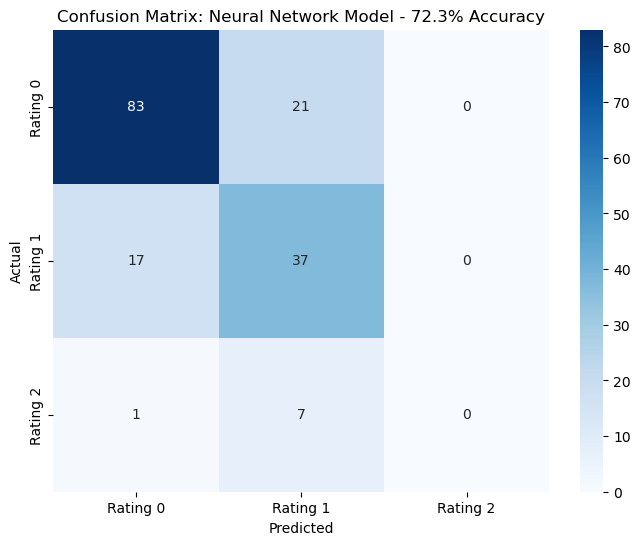

In [186]:
# Import confusion_matrix function
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rating 0', 'Rating 1', 'Rating 2'], 
            yticklabels=['Rating 0', 'Rating 1', 'Rating 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Neural Network Model - 72.3% Accuracy')
plt.savefig("Confusion Matrix Neural Network Model.png")
plt.show()



In [187]:
import numpy as np

# Assuming 'y_test' is your NumPy array
unique_values, counts = np.unique(y_test, return_counts=True)

# Print the count of each unique value
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Value: 0, Count: 104
Value: 1, Count: 54
Value: 2, Count: 8


In [192]:
#Neural Network Optimization #1
# Optimization by Adding Hidden Layers: 82.4% accuracy

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 10

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features_total, activation='relu'))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Adding a third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Check the structure of the model
nn_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 8)                 168       
                                                                 
 dense_71 (Dense)            (None, 5)                 45        
                                                                 
 dense_72 (Dense)            (None, 10)                60        
                                                                 
 dense_73 (Dense)            (None, 3)                 33        
                                                                 
Total params: 306 (1.20 KB)
Trainable params: 306 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
# Compile the model
nn_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fit_model = nn_2.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\MadSa\Anaconda\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 [==============================] - 1s 62ms/step - loss: 1.3896 - accuracy: 0.1838
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 1.2893 - accuracy: 0.2727
Epoch 3/100
16/16 [==============================] - 1s 62ms/step - loss: 1.2135 - accuracy: 0.3273
Epoch 4/100
16/16 [==============================] - 1s 62ms/step - loss: 1.1566 - accuracy: 0.3899
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 1.1159 - accuracy: 0.4343
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 1.0822 - accuracy: 0.5030
Epoch 7/100
16/16 [==============================] - 1s 67ms/step - loss: 1.0511 - accuracy: 0.5455
Epoch 8/100
16/16 [==============================] - 1s 62ms/step - loss: 1.0248 - accuracy: 0.5939
Epoch 9/100
16/16 [==============================] - 1s 62ms/step - loss: 0.9963 - accuracy: 0.6162
Epoch 10/100
16/16 [==============================] - 1s 61ms/step - loss: 0.9680 - accuracy: 0.6323
Epoch 11/10

16/16 [==============================] - 1s 56ms/step - loss: 0.4731 - accuracy: 0.7919
Epoch 83/100
16/16 [==============================] - 1s 67ms/step - loss: 0.4725 - accuracy: 0.7939
Epoch 84/100
16/16 [==============================] - 1s 65ms/step - loss: 0.4702 - accuracy: 0.7939
Epoch 85/100
16/16 [==============================] - 1s 60ms/step - loss: 0.4686 - accuracy: 0.7960
Epoch 86/100
16/16 [==============================] - 1s 60ms/step - loss: 0.4678 - accuracy: 0.7960
Epoch 87/100
16/16 [==============================] - 1s 59ms/step - loss: 0.4655 - accuracy: 0.8020
Epoch 88/100
16/16 [==============================] - 1s 58ms/step - loss: 0.4633 - accuracy: 0.8040
Epoch 89/100
16/16 [==============================] - 1s 61ms/step - loss: 0.4618 - accuracy: 0.8000
Epoch 90/100
16/16 [==============================] - 1s 58ms/step - loss: 0.4597 - accuracy: 0.7980
Epoch 91/100
16/16 [==============================] - 1s 56ms/step - loss: 0.4576 - accuracy: 0.8061
Epo

In [190]:
# Use the trained model to make predictions (testing data)
y_pred_probabilities = nn_2.predict(X_test)

y_pred = np.argmax(y_pred_probabilities, axis=1)

accuracy = accuracy_score(y_pred, y_test)
accuracy

6/6 [==============================] - 0s 8ms/step


0.7951807228915663

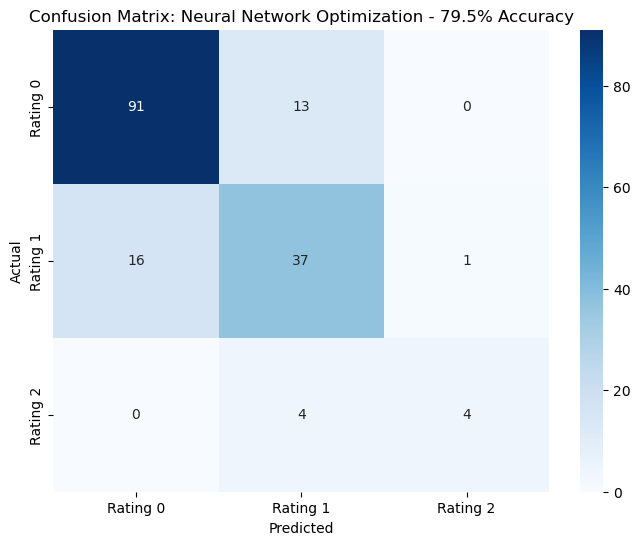

In [194]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rating 0', 'Rating 1', 'Rating 2'], 
            yticklabels=['Rating 0', 'Rating 1', 'Rating 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Neural Network Optimization - 79.5% Accuracy')
plt.savefig("Confusion Matrix Neural Network Optimization.png")
plt.show()
